In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
from lassolver.utils.func import *
from lassolver.utils.signal import *
from lassolver.utils.utils import *

from lassolver.matrices.iid_gauss import iidGaussian
from lassolver.matrices.uni_invar import UniInvar

from lassolver.solver.oamp import OAMP

from lassolver.dsolver.d_oamp import D_OAMP
from lassolver.experimental.d_oamp_exp import D_OAMP_exp

# 数値実験の設定

In [20]:
N = 4000  # 列数
alpha = 0.5  # 圧縮率
M = int(alpha*N)  # 行数
rho = 0.2  # 非零成分の割合

In [21]:
SNR = 30  # 信号対雑音比
kappa = 5  # 条件数
P = 10  # ノード数
T = 40  # 反復回数
sim = 100  # 実験数

In [22]:
x = [bernouli_gaussian(N, rho) for _ in range(sim)]
modes = ['MF', 'PINV', 'LMMSE']
SNRdB = 10**(0.1*SNR)

# i.i.d.ガウス行列での信号再構成

In [23]:
MSE_iidG_oamp = np.empty((sim, 3, T+1))

MSE_iidG_doamp = np.empty((sim, 3, T+1))
CommCost_iidG_doamp = np.empty((sim, 3, T))

MSE_iidG_doamp_exp = np.empty((sim, 3, T+1))
CommCost_iidG_doamp_exp = np.empty((sim, 3, T))

In [24]:
for i in tqdm(range(sim)):
    iidG = iidGaussian(M, N, m=0, v=1/M)
    sigma = np.var(iidG.A @ x[i]) / SNRdB
    noise = np.random.normal(0, sigma**0.5, (M, 1))

    oamps = [OAMP(iidG.A, x[i], noise) for _ in modes]
    doamps = [D_OAMP(iidG.A, x[i], noise, P) for _ in modes]
    doamp_exps = [D_OAMP_exp(iidG.A, x[i], noise, P) for _ in modes]

    for j, mode in enumerate(modes):
        oamps[j].estimate(T, ord=mode)  # OAMP
        MSE_iidG_oamp[i, j] = oamps[j].mse

        doamps[j].estimate(T, ord=mode)  # D-OAMP
        MSE_iidG_doamp[i, j] = doamps[j].mse
        CommCost_iidG_doamp[i, j] = doamps[j].communication_cost

        doamp_exps[j].estimate(T, ord=mode)  # D-OAMP_exp
        MSE_iidG_doamp_exp[i, j] = doamp_exps[j].mse
        CommCost_iidG_doamp_exp[i, j] = doamp_exps[j].communication_cost

100%|██████████| 100/100 [11:36:07<00:00, 417.67s/it] 


In [25]:
MSE_iidG_oamp_mean = np.empty((3, T+1))

MSE_iidG_doamp_mean = np.empty((3, T+1))
CommCost_iidG_doamp_mean = np.empty((3, T))

MSE_iidG_doamp_exp_mean = np.empty((3, T+1))
CommCost_iidG_doamp_exp_mean = np.empty((3, T))

for i in range(3):
    MSE_iidG_oamp_mean[i] = np.mean(MSE_iidG_oamp[:, i], axis=0)

    MSE_iidG_doamp_mean[i] = np.mean(MSE_iidG_doamp[:, i], axis=0)
    CommCost_iidG_doamp_mean[i] = np.mean(CommCost_iidG_doamp[:, i], axis=0)
    
    MSE_iidG_doamp_exp_mean[i] = np.mean(MSE_iidG_doamp_exp[:, i], axis=0)
    CommCost_iidG_doamp_exp_mean[i] = np.mean(CommCost_iidG_doamp_exp[:, i], axis=0)

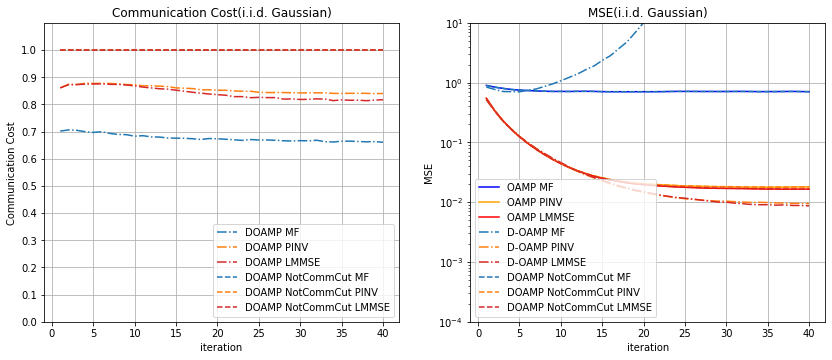

In [26]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(i.i.d. Gaussian)')
plt_CC(CommCost_iidG_doamp_mean[0], 'DOAMP MF', T, N, P, 'tab:blue', '-.')
plt_CC(CommCost_iidG_doamp_mean[1], 'DOAMP PINV', T, N, P, 'tab:orange', '-.')
plt_CC(CommCost_iidG_doamp_mean[2], 'DOAMP LMMSE', T, N, P, 'tab:red', '-.')

plt_CC(CommCost_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, N, P, 'tab:blue', '--')
plt_CC(CommCost_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, N, P, 'tab:orange', '--')
plt_CC(CommCost_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, N, P, 'tab:red', '--')
plt.grid()


plt.subplot(122)
plt.title('MSE(i.i.d. Gaussian)')
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'red')

plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red', '-.')

plt_MSE(MSE_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt_MSE(MSE_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt_MSE(MSE_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.legend(loc="lower left")
plt.grid()

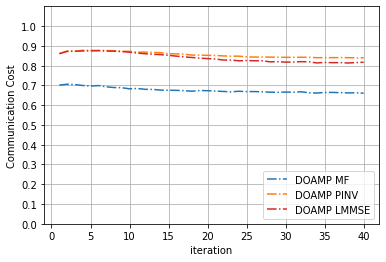

In [27]:
plt_CC(CommCost_iidG_doamp_mean[0], 'DOAMP MF', T, N, P, 'tab:blue', '-.')
plt_CC(CommCost_iidG_doamp_mean[1], 'DOAMP PINV', T, N, P, 'tab:orange', '-.')
plt_CC(CommCost_iidG_doamp_mean[2], 'DOAMP LMMSE', T, N, P, 'tab:red', '-.')
plt.grid()

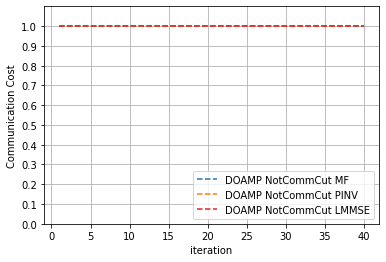

In [28]:
plt_CC(CommCost_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, N, P, 'tab:blue', '--')
plt_CC(CommCost_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, N, P, 'tab:orange', '--')
plt_CC(CommCost_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, N, P, 'tab:red', '--')
plt.grid()

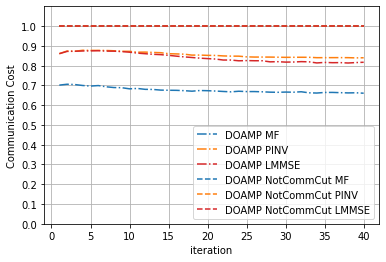

In [29]:
plt_CC(CommCost_iidG_doamp_mean[0], 'DOAMP MF', T, N, P, 'tab:blue', '-.')
plt_CC(CommCost_iidG_doamp_mean[1], 'DOAMP PINV', T, N, P, 'tab:orange', '-.')
plt_CC(CommCost_iidG_doamp_mean[2], 'DOAMP LMMSE', T, N, P, 'tab:red', '-.')

plt_CC(CommCost_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, N, P, 'tab:blue', '--')
plt_CC(CommCost_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, N, P, 'tab:orange', '--')
plt_CC(CommCost_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, N, P, 'tab:red', '--')
plt.grid()

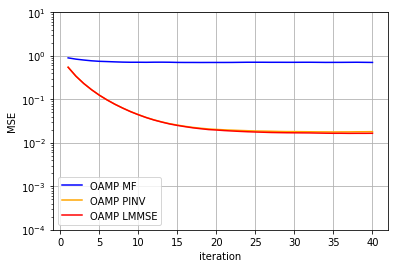

In [30]:
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'red')
plt.grid()

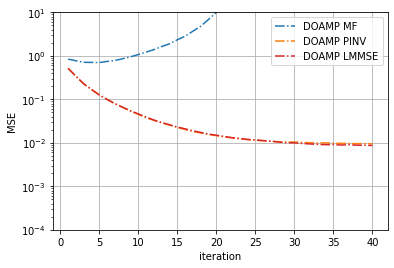

In [31]:
plt_MSE(MSE_iidG_doamp_mean[0], 'DOAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_iidG_doamp_mean[1], 'DOAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_iidG_doamp_mean[2], 'DOAMP LMMSE', T, 'tab:red', '-.')
plt.grid()

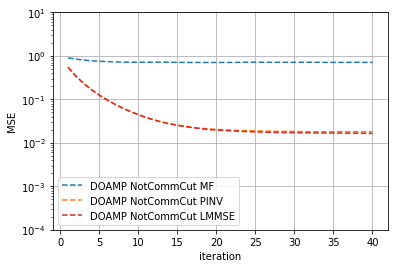

In [32]:
plt_MSE(MSE_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt_MSE(MSE_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt_MSE(MSE_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.grid()

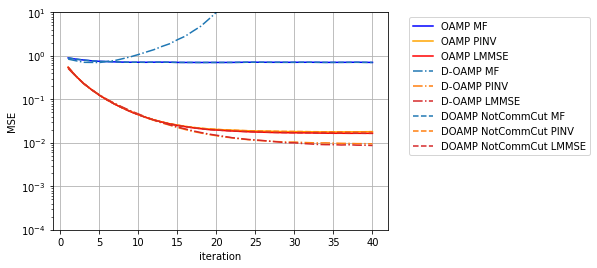

In [33]:
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'red')

plt_MSE(MSE_iidG_doamp_mean[0], 'D-OAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_iidG_doamp_mean[1], 'D-OAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_iidG_doamp_mean[2], 'D-OAMP LMMSE', T, 'tab:red', '-.')

plt_MSE(MSE_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt_MSE(MSE_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt_MSE(MSE_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

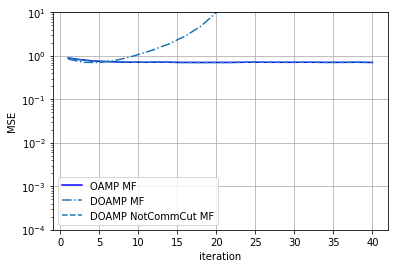

In [34]:
plt_MSE(MSE_iidG_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_iidG_doamp_mean[0], 'DOAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_iidG_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt.grid()

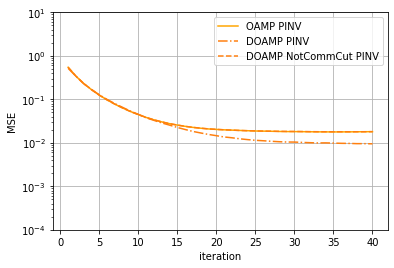

In [35]:
plt_MSE(MSE_iidG_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_iidG_doamp_mean[1], 'DOAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_iidG_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt.grid()

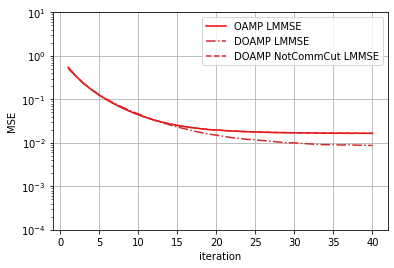

In [36]:
plt_MSE(MSE_iidG_oamp_mean[2], 'OAMP LMMSE', T, 'red')
plt_MSE(MSE_iidG_doamp_mean[2], 'DOAMP LMMSE', T, 'tab:red', '-.')
plt_MSE(MSE_iidG_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.grid()

# ユニタリ不変行列での信号再構成

In [37]:
MSE_UniInv_oamp = np.empty((sim, 3, T+1))

MSE_UniInv_doamp = np.empty((sim, 3, T+1))
CommCost_UniInv_doamp = np.empty((sim, 3, T))

MSE_UniInv_doamp_exp = np.empty((sim, 3, T+1))
CommCost_UniInv_doamp_exp = np.empty((sim, 3, T))

In [38]:
for i in tqdm(range(sim)):
    UniInv = UniInvar(M, N, kappa)
    sigma = np.var(UniInv.A @ x[i]) / SNRdB
    noise = np.random.normal(0, sigma**0.5, (M, 1))

    oamps = [OAMP(UniInv.A, x[i], noise) for _ in modes]
    doamps = [D_OAMP(UniInv.A, x[i], noise, P) for _ in modes]
    doamp_exps = [D_OAMP_exp(UniInv.A, x[i], noise, P) for _ in modes]

    for j, mode in enumerate(modes):
        oamps[j].estimate(T, ord=mode)
        MSE_UniInv_oamp[i, j] = oamps[j].mse

        doamps[j].estimate(T, ord=mode)
        MSE_UniInv_doamp[i, j] = doamps[j].mse
        CommCost_UniInv_doamp[i, j] = doamps[j].communication_cost

        doamp_exps[j].estimate(T, ord=mode)
        MSE_UniInv_doamp_exp[i, j] = doamp_exps[j].mse
        CommCost_UniInv_doamp_exp[i, j] = doamp_exps[j].communication_cost

100%|██████████| 100/100 [22:39:14<00:00, 815.55s/it]  


In [39]:
MSE_UniInv_oamp_mean = np.empty((3, T+1))

MSE_UniInv_doamp_mean = np.empty((3, T+1))
CommCost_UniInv_doamp_mean = np.empty((3, T))

MSE_UniInv_doamp_exp_mean = np.empty((3, T+1))
CommCost_UniInv_doamp_exp_mean = np.empty((3, T))

for i in range(3):
    MSE_UniInv_oamp_mean[i] = np.mean(MSE_UniInv_oamp[:, i], axis=0)

    MSE_UniInv_doamp_mean[i] = np.mean(MSE_UniInv_doamp[:, i], axis=0)
    CommCost_UniInv_doamp_mean[i] = np.mean(CommCost_UniInv_doamp[:, i], axis=0)

    MSE_UniInv_doamp_exp_mean[i] = np.mean(MSE_UniInv_doamp_exp[:, i], axis=0)
    CommCost_UniInv_doamp_exp_mean[i] = np.mean(CommCost_UniInv_doamp_exp[:, i], axis=0)

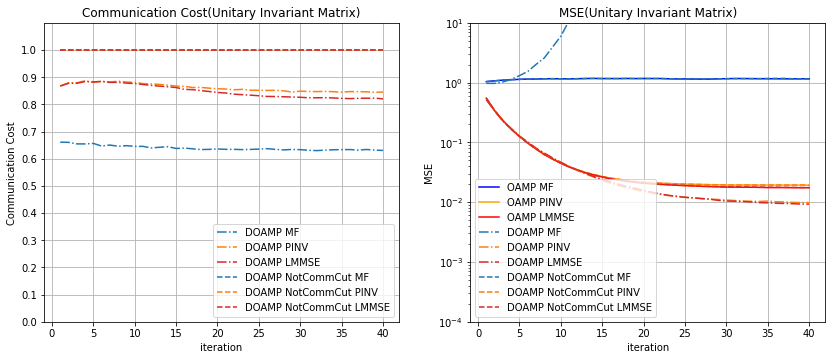

In [40]:
plt.figure(figsize=(14, 5.5))

plt.subplot(121)
plt.title('Communication Cost(Unitary Invariant Matrix)')
plt_CC(CommCost_UniInv_doamp_mean[0], 'DOAMP MF', T, N, P, 'tab:blue', '-.')
plt_CC(CommCost_UniInv_doamp_mean[1], 'DOAMP PINV', T, N, P, 'tab:orange', '-.')
plt_CC(CommCost_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, N, P, 'tab:red', '-.')

plt_CC(CommCost_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, N, P, 'tab:blue', '--')
plt_CC(CommCost_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, N, P, 'tab:orange', '--')
plt_CC(CommCost_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, N, P, 'tab:red', '--')
plt.grid()


plt.subplot(122)
plt.title('MSE(Unitary Invariant Matrix)')
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'red')

plt_MSE(MSE_UniInv_doamp_mean[0], 'DOAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_UniInv_doamp_mean[1], 'DOAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, 'tab:red', '-.')

plt_MSE(MSE_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt_MSE(MSE_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt_MSE(MSE_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.legend(loc="lower left")
plt.grid()

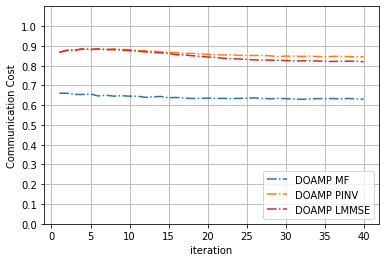

In [41]:
plt_CC(CommCost_UniInv_doamp_mean[0], 'DOAMP MF', T, N, P, 'tab:blue', '-.')
plt_CC(CommCost_UniInv_doamp_mean[1], 'DOAMP PINV', T, N, P, 'tab:orange', '-.')
plt_CC(CommCost_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, N, P, 'tab:red', '-.')
plt.grid()

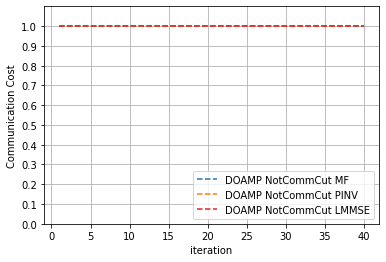

In [42]:
plt_CC(CommCost_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, N, P, 'tab:blue', '--')
plt_CC(CommCost_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, N, P, 'tab:orange', '--')
plt_CC(CommCost_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, N, P, 'tab:red', '--')
plt.grid()

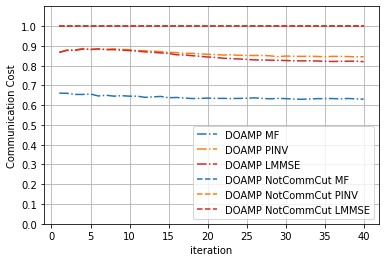

In [43]:
plt_CC(CommCost_UniInv_doamp_mean[0], 'DOAMP MF', T, N, P, 'tab:blue', '-.')
plt_CC(CommCost_UniInv_doamp_mean[1], 'DOAMP PINV', T, N, P, 'tab:orange', '-.')
plt_CC(CommCost_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, N, P, 'tab:red', '-.')

plt_CC(CommCost_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, N, P, 'tab:blue', '--')
plt_CC(CommCost_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, N, P, 'tab:orange', '--')
plt_CC(CommCost_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, N, P, 'tab:red', '--')
plt.grid()

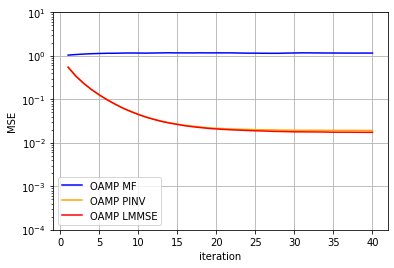

In [44]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'red')
plt.grid()

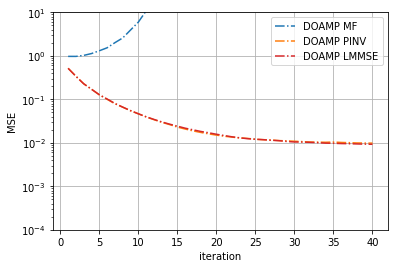

In [45]:
plt_MSE(MSE_UniInv_doamp_mean[0], 'DOAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_UniInv_doamp_mean[1], 'DOAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, 'tab:red', '-.')
plt.grid()

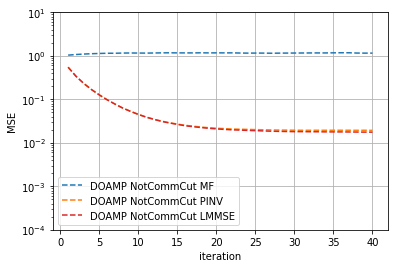

In [46]:
plt_MSE(MSE_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt_MSE(MSE_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt_MSE(MSE_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.grid()

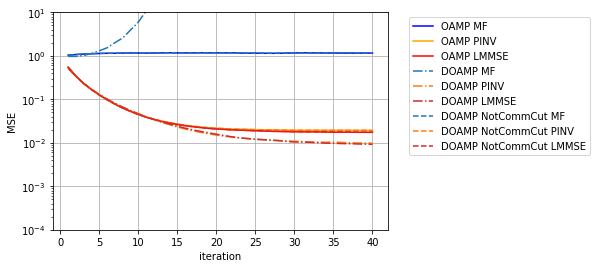

In [47]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'red')

plt_MSE(MSE_UniInv_doamp_mean[0], 'DOAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_UniInv_doamp_mean[1], 'DOAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, 'tab:red', '-.')

plt_MSE(MSE_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt_MSE(MSE_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt_MSE(MSE_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

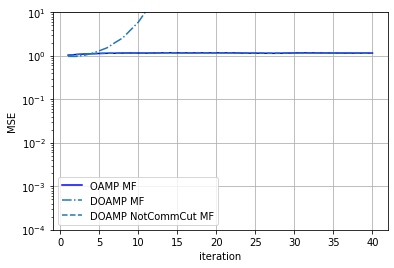

In [48]:
plt_MSE(MSE_UniInv_oamp_mean[0], 'OAMP MF', T, 'blue')
plt_MSE(MSE_UniInv_doamp_mean[0], 'DOAMP MF', T, 'tab:blue', '-.')
plt_MSE(MSE_UniInv_doamp_exp_mean[0], 'DOAMP NotCommCut MF', T, 'tab:blue', '--')
plt.grid()

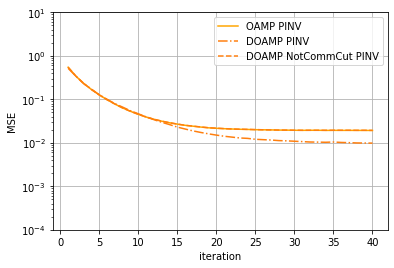

In [51]:
plt_MSE(MSE_UniInv_oamp_mean[1], 'OAMP PINV', T, 'orange')
plt_MSE(MSE_UniInv_doamp_mean[1], 'DOAMP PINV', T, 'tab:orange', '-.')
plt_MSE(MSE_UniInv_doamp_exp_mean[1], 'DOAMP NotCommCut PINV', T, 'tab:orange', '--')
plt.grid()

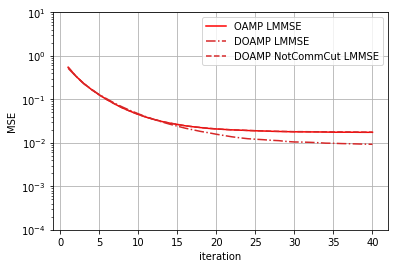

In [50]:
plt_MSE(MSE_UniInv_oamp_mean[2], 'OAMP LMMSE', T, 'red')
plt_MSE(MSE_UniInv_doamp_mean[2], 'DOAMP LMMSE', T, 'tab:red', '-.')
plt_MSE(MSE_UniInv_doamp_exp_mean[2], 'DOAMP NotCommCut LMMSE', T, 'tab:red', '--')
plt.grid()